# TFM.

# Análisis de clasificación

### Secciones

- Analizando clasificación

In [1]:
import pyodbc

server = 'XXX' 
database = 'bioe' 
username = 'bioe' 
password = 'XXX' 
trusted = 'yes;' 

cnxn = pyodbc.connect('Driver={SQL Server};SERVER='+server+';DATABASE='+database+';ENCRYPT=no;'+username+';PWD='+ password)
cursor = cnxn.cursor()

import pandas as pd


#### Analizando la clasificación (separación con dG y potenciales CCharPPI - una dimensión)

(mediante densidad)

C:\Users\coept\AppData\Local\Temp\ipykernel_7856\4102041824.py:10: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  ld = pd.read_sql_query(query, cnxn)
C:\Users\coept\AppData\Local\Temp\ipykernel_7856\4102041824.py:21: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(query, cnxn)


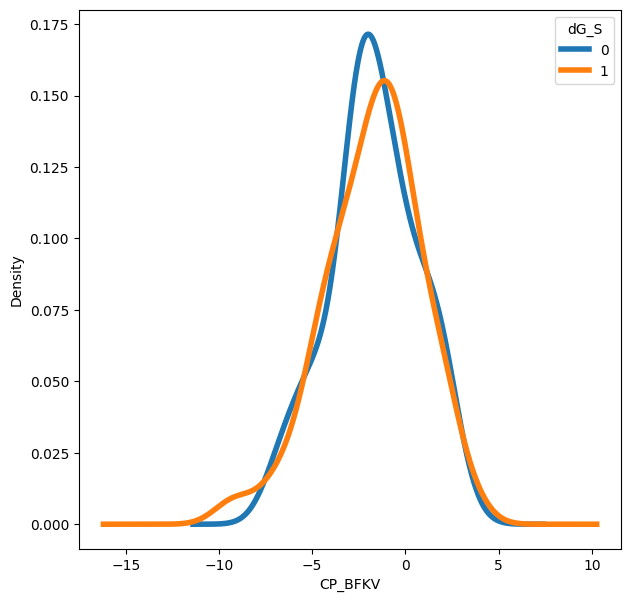

C:\Users\coept\AppData\Local\Temp\ipykernel_7856\4102041824.py:21: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(query, cnxn)


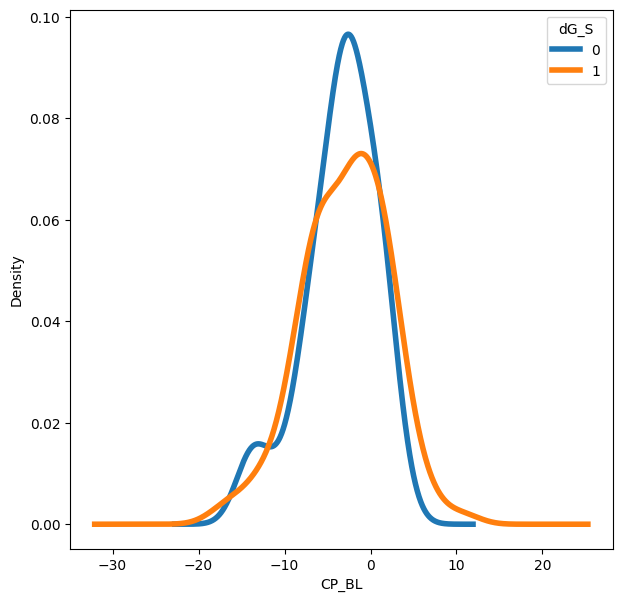

C:\Users\coept\AppData\Local\Temp\ipykernel_7856\4102041824.py:21: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(query, cnxn)


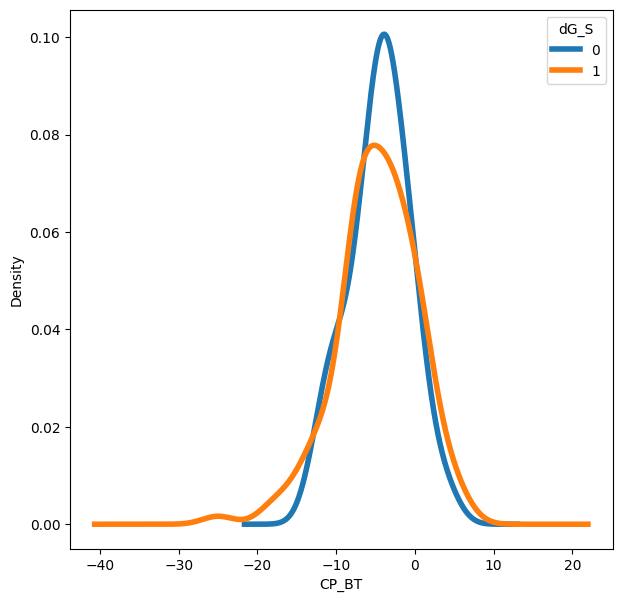

C:\Users\coept\AppData\Local\Temp\ipykernel_7856\4102041824.py:21: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(query, cnxn)


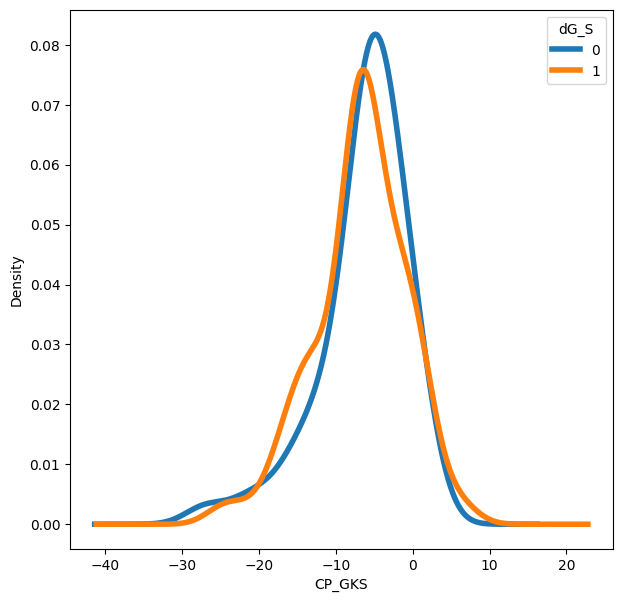

C:\Users\coept\AppData\Local\Temp\ipykernel_7856\4102041824.py:21: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(query, cnxn)


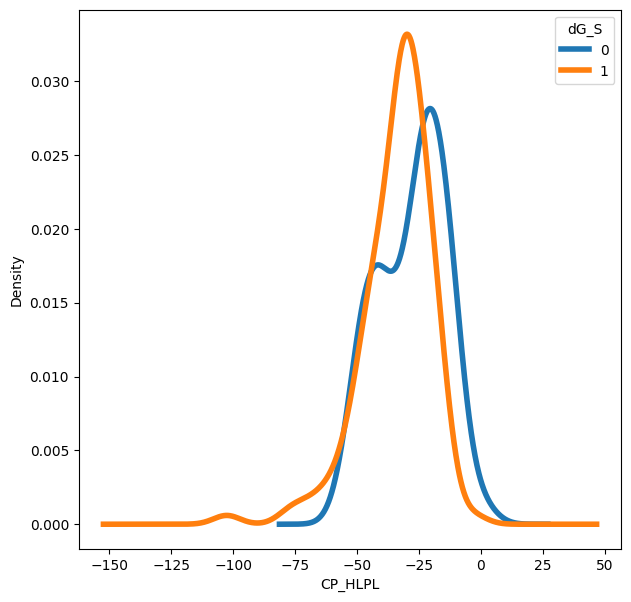

C:\Users\coept\AppData\Local\Temp\ipykernel_7856\4102041824.py:21: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(query, cnxn)


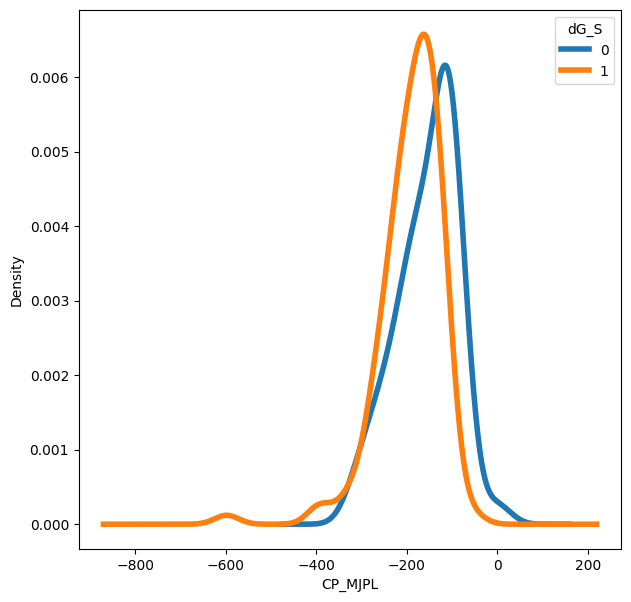

C:\Users\coept\AppData\Local\Temp\ipykernel_7856\4102041824.py:21: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(query, cnxn)


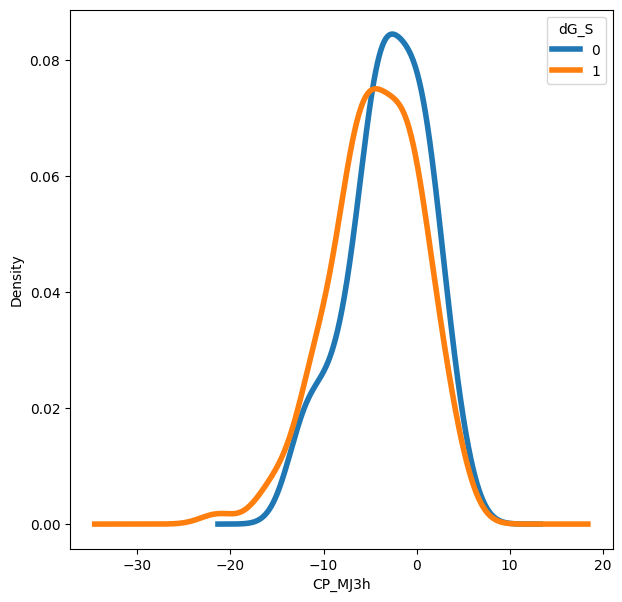

C:\Users\coept\AppData\Local\Temp\ipykernel_7856\4102041824.py:21: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(query, cnxn)


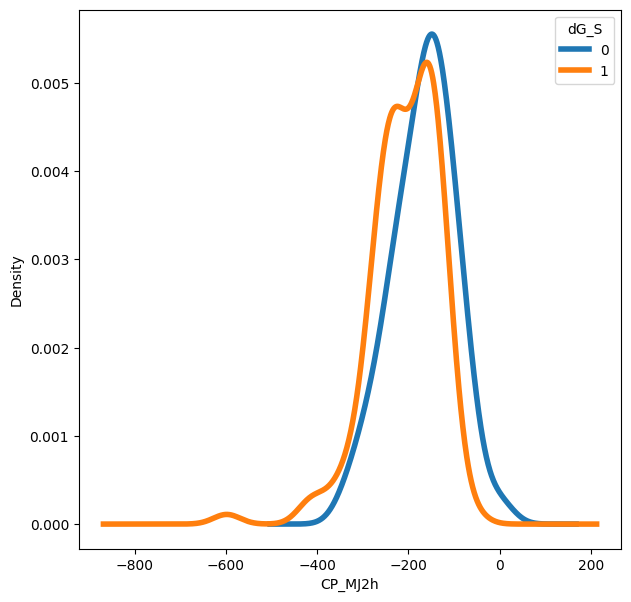

C:\Users\coept\AppData\Local\Temp\ipykernel_7856\4102041824.py:21: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(query, cnxn)


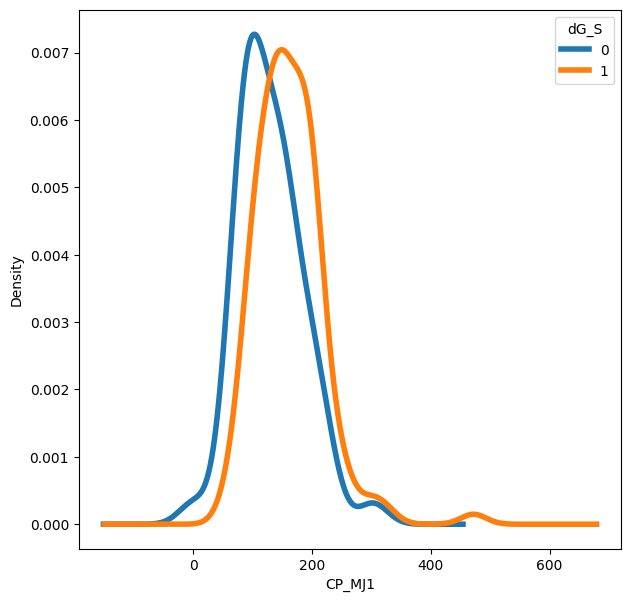

C:\Users\coept\AppData\Local\Temp\ipykernel_7856\4102041824.py:21: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(query, cnxn)


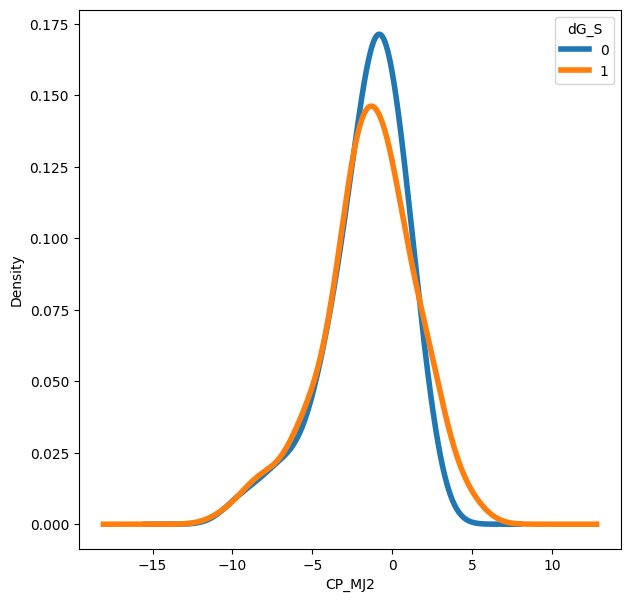

In [23]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

lista_descriptores = ["CP_BFKV","CP_BL"]
top = "10"
query = "select top(" + top + ") col.name from sys.objects as tab inner join sys.columns as col on tab.object_id = col.object_id" + \
	" where tab.name = 'tfm_NNaN0' and col.name not in ('Complex','benchmark','dG') order by column_id;"
#print(query)
ld = pd.read_sql_query(query, cnxn)
#print(ld.head())
col_one_list = ld['name'].tolist()
#print(f"\ncol_one_list:\n{col_one_list}\ntype:{type(col_one_list)}")
lista_descriptores = col_one_list
for idesc in lista_descriptores:
    #print(idesc)

    query = "SELECT [Complex],[dG_S],[" + idesc + "] FROM [TFM].[tfm_NNaN0_S] () ORDER BY [Complex];"
    #print(query)

    df = pd.read_sql_query(query, cnxn)
    #print(df.head(5))

    # converting data into wide-format
    data_wide = df.pivot(columns='dG_S', values=idesc)
    data_wide.head()

    # calling density() to make
    # multiple density plot 
    data_wide.plot.density(figsize = (7, 7), linewidth = 4)
  
    plt.xlabel(idesc)
    plt.savefig('../tmp/clasif_'+idesc+'.png', dpi=300)
    plt.show()


(mediante histograma)

C:\Users\coept\AppData\Local\Temp\ipykernel_7856\3735087168.py:10: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  ld = pd.read_sql_query(query, cnxn)
C:\Users\coept\AppData\Local\Temp\ipykernel_7856\3735087168.py:21: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(query, cnxn)


CP_BFKV
      Complex  dG_S  CP_BFKV
0   1A2K_C:AB     1  -0.8654
1    1ACB_E:I     1  -2.3756
2   1AHW_AB:C     1  -1.0114
3    1AK4_A:D     0   1.1344
4  1AKJ_AB:DE     0   1.5450


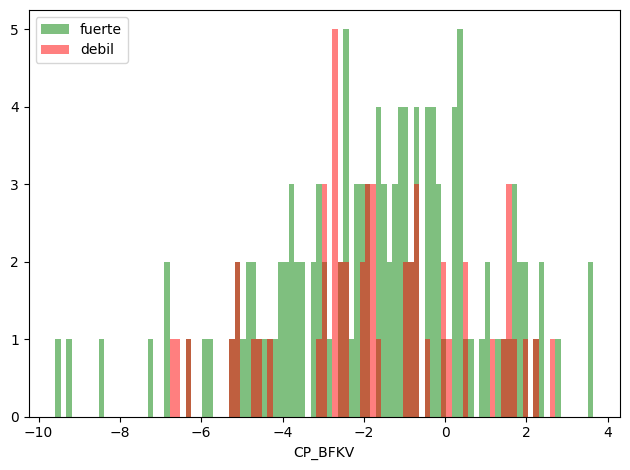

CP_BL
      Complex  dG_S  CP_BL
0   1A2K_C:AB     1 -6.506
1    1ACB_E:I     1 -6.130
2   1AHW_AB:C     1 -8.650
3    1AK4_A:D     0 -2.076
4  1AKJ_AB:DE     0 -4.558


C:\Users\coept\AppData\Local\Temp\ipykernel_7856\3735087168.py:21: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(query, cnxn)


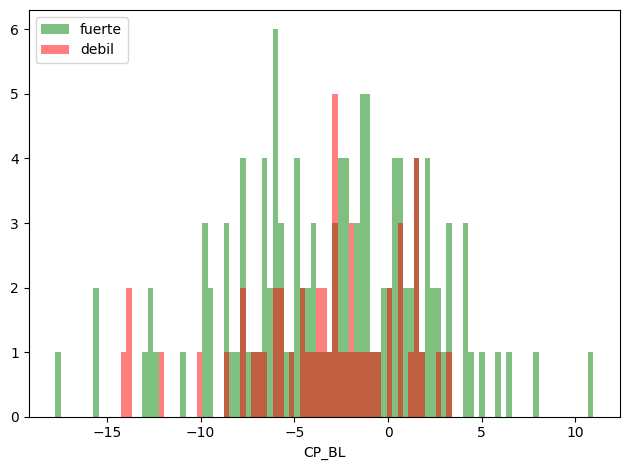

CP_BT
      Complex  dG_S  CP_BT
0   1A2K_C:AB     1  -5.48
1    1ACB_E:I     1  -7.74
2   1AHW_AB:C     1  -4.96
3    1AK4_A:D     0  -3.98
4  1AKJ_AB:DE     0   2.74


C:\Users\coept\AppData\Local\Temp\ipykernel_7856\3735087168.py:21: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(query, cnxn)


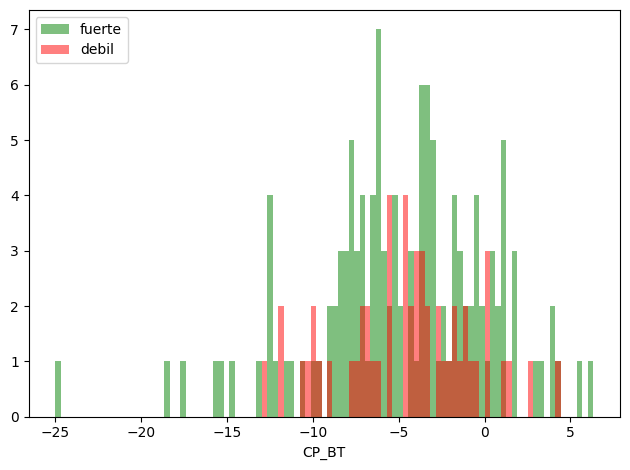

CP_GKS
      Complex  dG_S  CP_GKS
0   1A2K_C:AB     1    -8.0
1    1ACB_E:I     1    -2.4
2   1AHW_AB:C     1   -14.0
3    1AK4_A:D     0    -4.0
4  1AKJ_AB:DE     0   -10.0


C:\Users\coept\AppData\Local\Temp\ipykernel_7856\3735087168.py:21: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(query, cnxn)


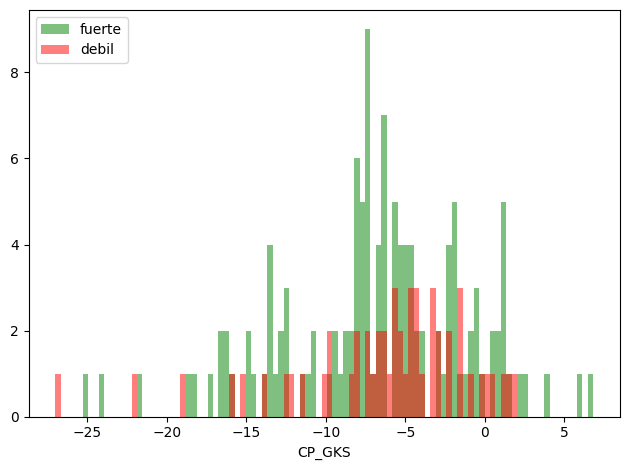

CP_HLPL
      Complex  dG_S  CP_HLPL
0   1A2K_C:AB     1    -28.6
1    1ACB_E:I     1    -34.0
2   1AHW_AB:C     1    -34.2
3    1AK4_A:D     0    -12.0
4  1AKJ_AB:DE     0    -26.8


C:\Users\coept\AppData\Local\Temp\ipykernel_7856\3735087168.py:21: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(query, cnxn)


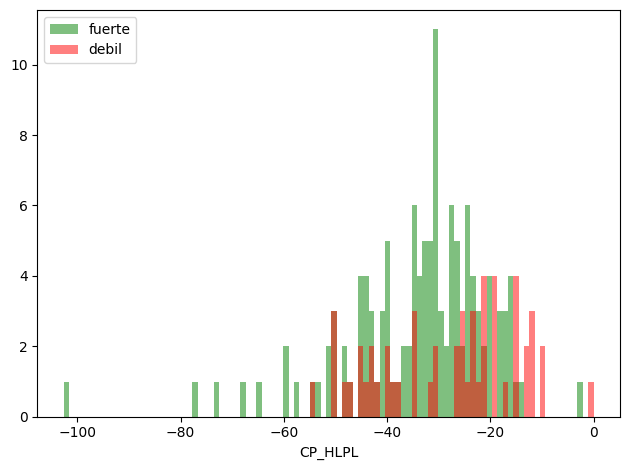

CP_MJPL
      Complex  dG_S  CP_MJPL
0   1A2K_C:AB     1   -140.8
1    1ACB_E:I     1   -178.0
2   1AHW_AB:C     1   -196.2
3    1AK4_A:D     0   -122.4
4  1AKJ_AB:DE     0   -191.2


C:\Users\coept\AppData\Local\Temp\ipykernel_7856\3735087168.py:21: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(query, cnxn)


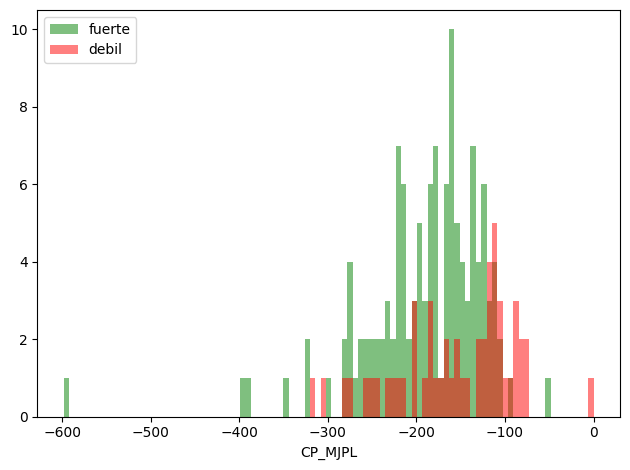

CP_MJ3h
      Complex  dG_S  CP_MJ3h
0   1A2K_C:AB     1    -2.96
1    1ACB_E:I     1   -11.50
2   1AHW_AB:C     1     2.36
3    1AK4_A:D     0    -2.90
4  1AKJ_AB:DE     0     4.64


C:\Users\coept\AppData\Local\Temp\ipykernel_7856\3735087168.py:21: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(query, cnxn)


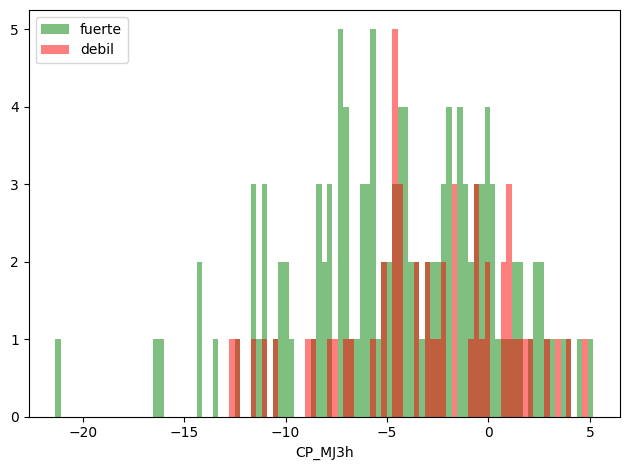

CP_MJ2h
      Complex  dG_S  CP_MJ2h
0   1A2K_C:AB     1  -184.80
1    1ACB_E:I     1  -232.92
2   1AHW_AB:C     1  -158.48
3    1AK4_A:D     0  -141.98
4  1AKJ_AB:DE     0  -155.10


C:\Users\coept\AppData\Local\Temp\ipykernel_7856\3735087168.py:21: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(query, cnxn)


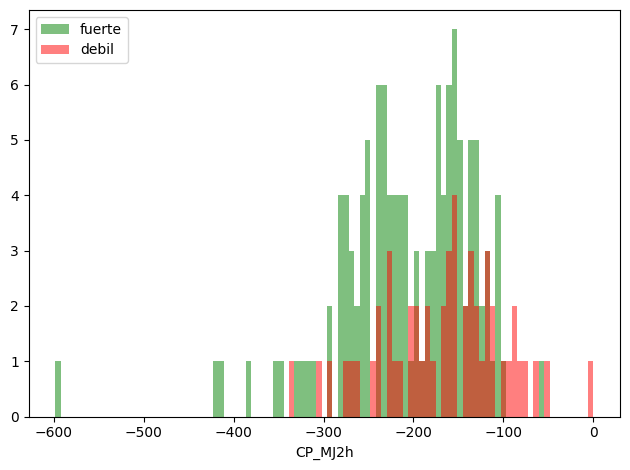

CP_MJ1
      Complex  dG_S  CP_MJ1
0   1A2K_C:AB     1  145.72
1    1ACB_E:I     1  147.22
2   1AHW_AB:C     1  150.20
3    1AK4_A:D     0  114.32
4  1AKJ_AB:DE     0  147.08


C:\Users\coept\AppData\Local\Temp\ipykernel_7856\3735087168.py:21: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(query, cnxn)


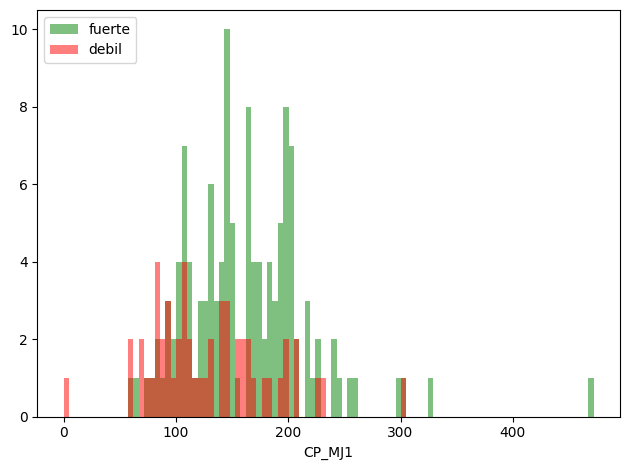

CP_MJ2
      Complex  dG_S  CP_MJ2
0   1A2K_C:AB     1   -2.40
1    1ACB_E:I     1   -0.76
2   1AHW_AB:C     1   -4.02
3    1AK4_A:D     0   -0.96
4  1AKJ_AB:DE     0   -2.16


C:\Users\coept\AppData\Local\Temp\ipykernel_7856\3735087168.py:21: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(query, cnxn)


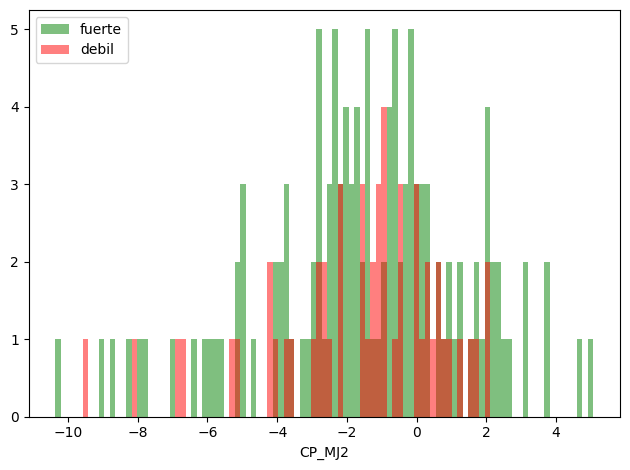

In [28]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

lista_descriptores = ["CP_BFKV","CP_BL"]
top = "10"
query = "select top(" + top + ") col.name from sys.objects as tab inner join sys.columns as col on tab.object_id = col.object_id" + \
	" where tab.name = 'tfm_NNaN0' and col.name not in ('Complex','benchmark','dG') order by column_id;"
#print(query)
ld = pd.read_sql_query(query, cnxn)
#print(ld.head())
col_one_list = ld['name'].tolist()
#print(f"\ncol_one_list:\n{col_one_list}\ntype:{type(col_one_list)}")
lista_descriptores = col_one_list
for idesc in lista_descriptores:
    print(idesc)

    query = "SELECT [Complex],[dG_S],[" + idesc + "] FROM [TFM].[tfm_NNaN0_S] () ORDER BY [Complex];"
    #print(query)

    df = pd.read_sql_query(query, cnxn)
    print(df.head(5))

    # select fuerte y débil
    fuerte = df.loc[df["dG_S"] == 1]
    debil = df.loc[df["dG_S"] == 0]
    #print(strong.head(5))
    #print(df[idesc].min())
    #print(df[idesc].max())

    # plot data
    bins = np.linspace(df[idesc].min(), df[idesc].max(), 100)
    plt.hist(fuerte[idesc], bins, alpha=0.5, color='green', label='fuerte')
    plt.hist(debil[idesc], bins, alpha=0.5, color='red', label='debil')

    plt.xlabel(idesc)
    plt.legend(loc='upper left')

    plt.tight_layout()
    plt.savefig('../tmp/clasifH_'+idesc+'.png', dpi=300)
    plt.show()
    

#### Analizando la clasificación (separación con dG y potenciales CCharPPI - dos dimensiones)

Analizando la clasificación (separación con pares de potenciales CCharPPI)

['CP_BL', 'CP_MJ3h']
CP_BL
CP_MJ3h


C:\Users\coept\AppData\Local\Temp\ipykernel_13516\1798041908.py:30: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(query, cnxn)


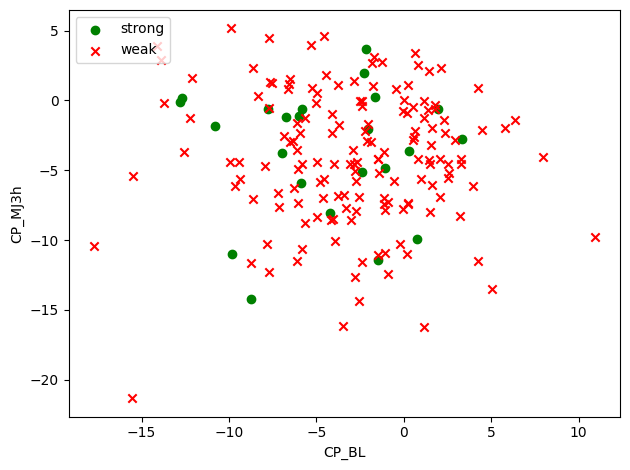

['CP_MJ2h', 'CP_TS']
CP_MJ2h
CP_TS


C:\Users\coept\AppData\Local\Temp\ipykernel_13516\1798041908.py:30: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(query, cnxn)


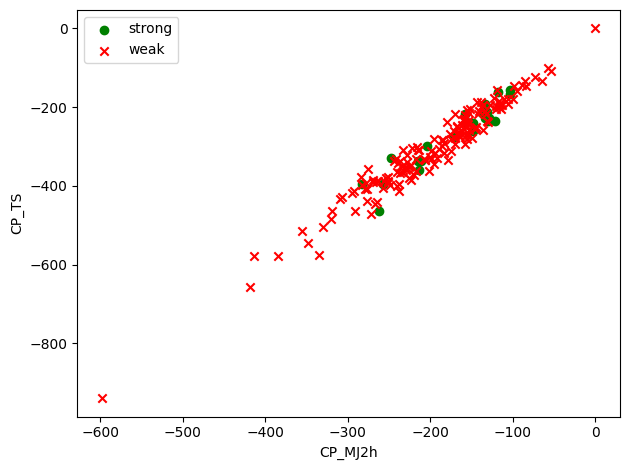

In [16]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

lista_descriptores = [["CP_BL","CP_MJ3h"],["CP_MJ2h","CP_TS"]]
for idesc in lista_descriptores:
    print(idesc)
    for iclasif in idesc:
        print(iclasif)
    descriptor1 = idesc[0]
    descriptor2 = idesc[1]
    query = "SELECT [Complex],CASE WHEN ([dG] < -9.0) THEN 1 ELSE -1 END AS [dG]" + \
        ",[" + descriptor1 + "],[" + descriptor2 + "]" + " FROM [bioe].[TFM].[tfm_nan0] ()" + " ORDER BY [Complex];"
    query = "SELECT [Complex],[dG_S],[" + descriptor1 + "],[" + descriptor2 + "] FROM [TFM].[tfm_NNaN0_S] () ORDER BY [Complex];"
    #print(query)

    df = pd.read_sql_query(query, cnxn)
    #print(df.head(5))

    # select strong and weak
    strong = df.loc[df["dG"] == 1]
    weak = df.loc[df["dG"] == -1]

    # plot data
    plt.scatter(strong[[descriptor1]], strong[[descriptor2]],
                color='green', marker='o', label='strong')
    plt.scatter(weak[[descriptor1]], weak[[descriptor2]],
                color='red', marker='x', label='weak')

    plt.xlabel(descriptor1)
    plt.ylabel(descriptor2)
    plt.legend(loc='upper left')

    plt.tight_layout()
    plt.show()
    